<a href="https://colab.research.google.com/github/wallaceleonardo/bootcamp-IGTI-Desenvolvedor_Python/blob/main/Algoritmo_Supervisionado_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exemplo do Algoritmo Supervisionado - KNN

In [18]:
#importando as bibliotecas
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib as plt

In [4]:
#cria a rotina para utilizar o dataset Iris
iris = datasets.load_iris()

In [5]:
#converte o banco de dados iris para o dataframe
df_iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])

In [6]:
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2     0.0
1                4.9               3.0  ...               0.2     0.0
2                4.7               3.2  ...               0.2     0.0
3                4.6               3.1  ...               0.2     0.0
4                5.0               3.6  ...               0.2     0.0

[5 rows x 5 columns]


In [9]:
#transforma os dados em array
X = df_iris.iloc[:, :-1].values #dados de entrada
y = df_iris.iloc[:, 4].values #dados de target

In [10]:
#realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split #função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) #divide 20% para teste

In [11]:
#realiza o processo de normalização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #objeto que normaliza os dados
scaler.fit(X_train) #realiza a normalização dos dados

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
#treina o modelo
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
classifier.fit(X_train, y_train) #aplica a classificação

KNeighborsClassifier()

In [13]:
#realiza a previsão
y_pred = classifier.predict(X_test)

In [15]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 4  0  0]
 [ 0 11  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Figure(432x288)


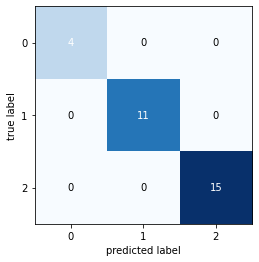

In [20]:
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
print(fig)